In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import re

In [5]:
data = pd.read_csv('2019.csv')
pd.set_option('display.max_columns', 33)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 23 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Timestamp                                                                                             991 non-null    object 
 1   Age                                                                                                   869 non-null    float64
 2   Gender                                                                                                977 non-null    object 
 3   City                                                                                                  977 non-null    object 
 4   Seniority level                                                                                       96

In [7]:
data.describe()

,Age,Years of experience,Yearly brutto salary (without bonus and stocks),Yearly bonus,Yearly stocks,Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,Yearly bonus one year ago. Only answer if staying in same country,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,0
count,869.000000,977.000000,976.000000,524.000000,197.000000,594.000000,250.000000,136.000000,917.000000,629.000000,0.0
mean,32.406214,8.497441,72546.403689,7858.969466,13103.468629,65999.577441,8042.428000,4488.398603,27.955289,6.496423,NaN
std,5.232564,5.037995,23509.316495,10367.038562,22644.679133,20467.994543,15097.821279,11662.130259,4.429231,15.498719,NaN
min,20.000000,0.000000,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,NaN
25%,29.000000,5.000000,60000.000000,275.000000,1.000000,55000.000000,1000.000000,0.000000,26.000000,2.000000,NaN
50%,32.000000,8.000000,70000.000000,5000.000000,2000.000000,65000.000000,5000.000000,0.055000,28.000000,4.000000,NaN
75%,35.000000,11.000000,80050.000000,10000.000000,20000.000000,75000.000000,8875.000000,2250.000000,30.000000,7.000000,NaN
max,54.000000,30.000000,216000.000000,80000.000000,140000.000000,200000.000000,150000.000000,80000.000000,100.000000,365.000000,NaN


In [8]:
missing_values = data.isna()
print(missing_values[missing_values > 0])

    Timestamp   Age Gender City Seniority level Position (without seniority)  \
0         NaN   NaN    NaN  NaN             NaN                          NaN   
1         NaN   NaN    NaN  NaN             NaN                          NaN   
2         NaN  True    NaN  NaN             NaN                          NaN   
3         NaN   NaN    NaN  NaN             NaN                          NaN   
4         NaN   NaN    NaN  NaN             NaN                          NaN   
..        ...   ...    ...  ...             ...                          ...   
986       NaN   NaN    NaN  NaN             NaN                          NaN   
987       NaN   NaN    NaN  NaN             NaN                          NaN   
988       NaN   NaN    NaN  NaN             NaN                          NaN   
989       NaN   NaN    NaN  NaN             NaN                          NaN   
990       NaN   NaN    NaN  NaN             NaN                          NaN   

    Years of experience Your main techn

In [10]:
data_cleaned = data.dropna()

In [11]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 23 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Timestamp                                                                                             0 non-null      object 
 1   Age                                                                                                   0 non-null      float64
 2   Gender                                                                                                0 non-null      object 
 3   City                                                                                                  0 non-null      object 
 4   Seniority level                                                                                       0 non-null      obj

In [12]:
missing_values = data_cleaned.isna()
print(missing_values[missing_values > 0])

Empty DataFrame
Columns: [Timestamp, Age, Gender, City, Seniority level, Position (without seniority), Years of experience, Your main technology / programming language, Yearly brutto salary (without bonus and stocks), Yearly bonus, Yearly stocks, Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country, Yearly bonus one year ago. Only answer if staying in same country, Yearly stocks one year ago. Only answer if staying in same country, Number of vacation days, Number of home office days per month, Main language at work, Company name , Company size, Company type, Сontract duration, Company business sector, 0]
Index: []


In [13]:
data_cleaned.describe()

,Age,Years of experience,Yearly brutto salary (without bonus and stocks),Yearly bonus,Yearly stocks,Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,Yearly bonus one year ago. Only answer if staying in same country,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data_cleaned.head()

,Timestamp,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,Yearly stocks,Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,Yearly bonus one year ago. Only answer if staying in same country,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0


In [15]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
age = data_cleaned['Age']
salary = data_cleaned['Yearly brutto salary (without bonus and stocks)']

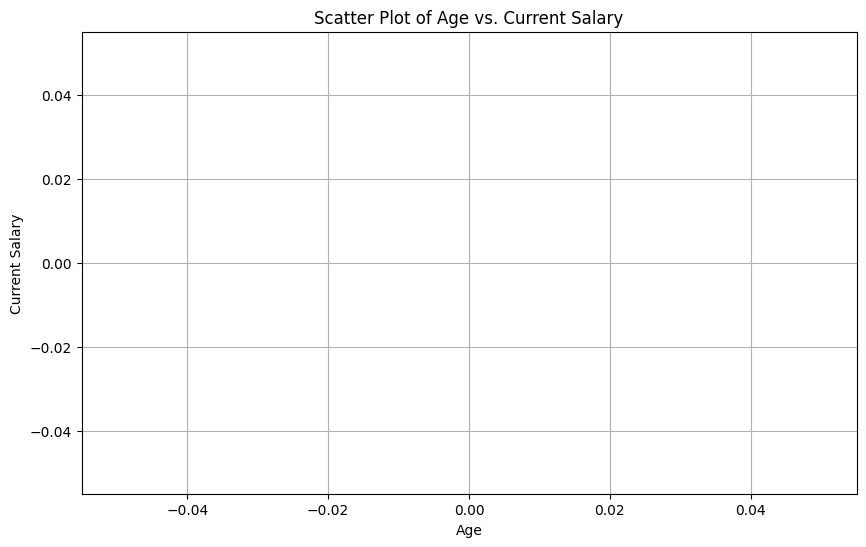

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(age, salary, alpha=0.5, color='blue')

plt.title('Scatter Plot of Age vs. Current Salary')
plt.xlabel('Age')
plt.ylabel('Current Salary')
plt.grid(True)

plt.show()

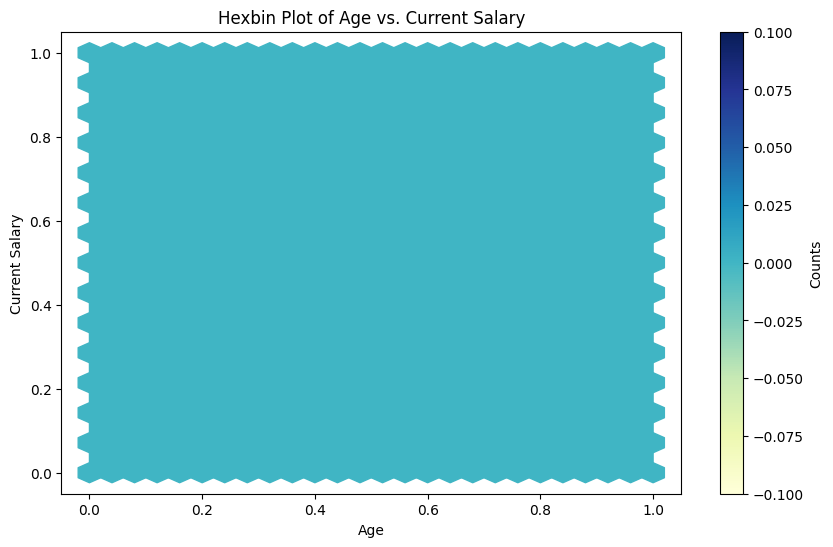

In [19]:

plt.figure(figsize=(10, 6))
plt.hexbin(age, salary, gridsize=25, cmap='YlGnBu')  

plt.title('Hexbin Plot of Age vs. Current Salary')
plt.xlabel('Age')
plt.ylabel('Current Salary')
plt.colorbar(label='Counts')

plt.show()

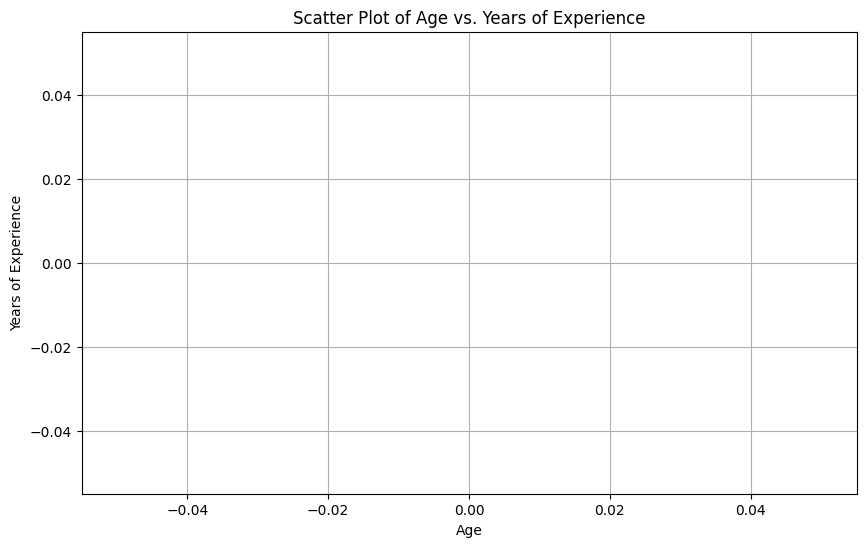

In [20]:
age = data_cleaned['Age']
experience = data_cleaned['Years of experience']

plt.figure(figsize=(10, 6))
plt.scatter(age, experience, c='blue', alpha=0.5)  

plt.title('Scatter Plot of Age vs. Years of Experience')
plt.xlabel('Age')
plt.ylabel('Years of Experience')

plt.grid(True)
plt.show()

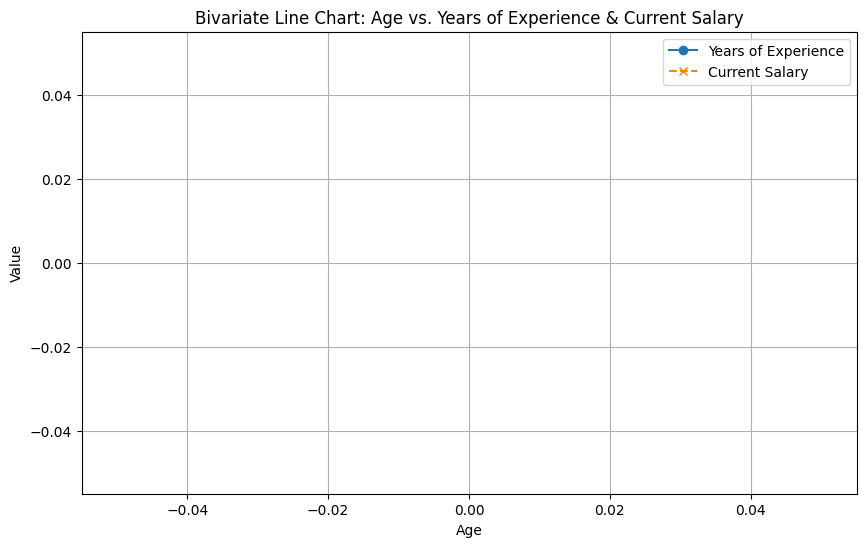

In [22]:
age = data_cleaned['Age']
experience = data_cleaned['Years of experience']
salary = data_cleaned['Yearly brutto salary (without bonus and stocks)']

plt.figure(figsize=(10, 6))
plt.plot(age, experience, label='Years of Experience', marker='o', linestyle='-')
plt.plot(age, salary, label='Current Salary', marker='x', linestyle='--')

plt.title('Bivariate Line Chart: Age vs. Years of Experience & Current Salary')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()

plt.grid(True)
plt.show()

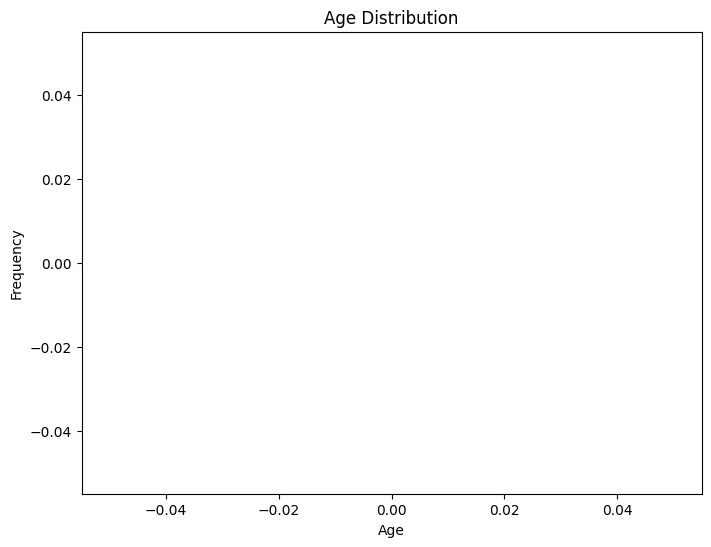

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

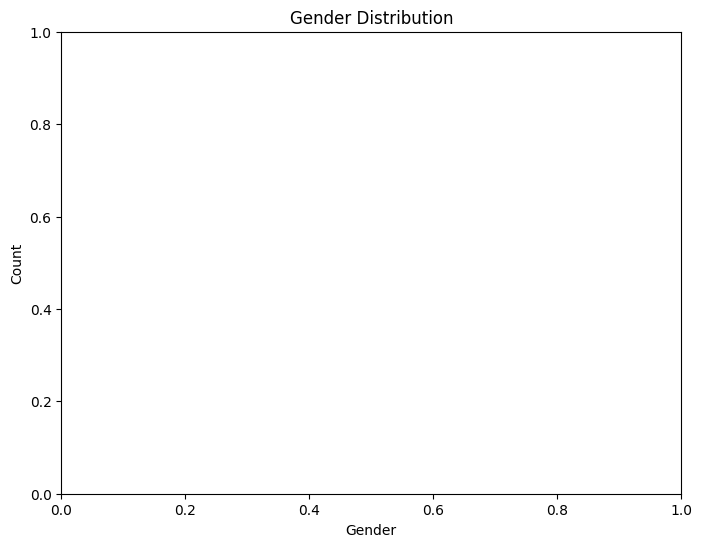

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

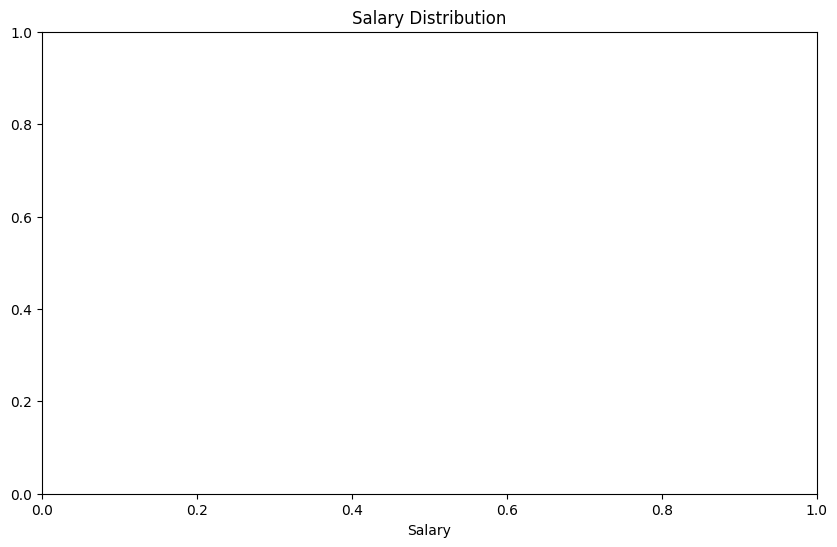

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x='Yearly brutto salary (without bonus and stocks)')
plt.xlabel('Salary')
plt.title('Salary Distribution')
plt.show()

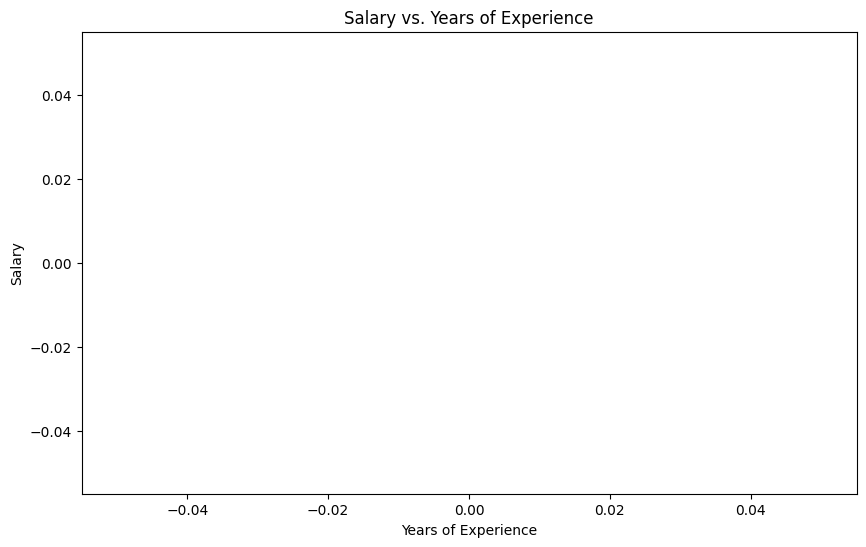

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='Years of experience', y='Yearly brutto salary (without bonus and stocks)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience')
plt.show()